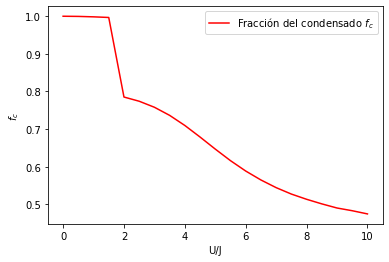

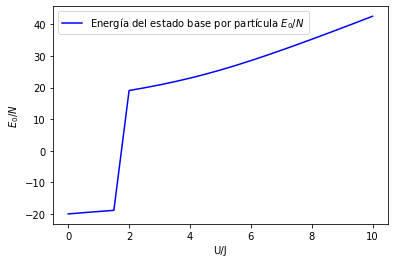

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigsh

primos = []

# función para generar N primos usando
# Criba de Eratostenes
def CribadeEras():
	# Creamos un arreglo booleano "primo[0..n]" 
	# inicializamod todas las entradas como true. Un valor
	# en primo[i] sera falso si i es no primo, otro caso true.  
	n = 1000005
	primo = [True for i in range(n + 1)]
	p = 2
	while (p * p <= n):
		# Si primo[p] no cambia, entonces es primo
		if (primo[p] == True):
			# Actualiza todos los múltiplos de p
			for i in range(p * p, n + 1, p):
				primo[i] = False
		p += 1
	# Imprime todos los primos
	for p in range(2, n + 1):
		if primo[p]:
			primos.append(p)
CribadeEras()

def tag(b,M):
    tag=0
    for j in range(M):
        tag=tag + b[j]*math.sqrt(primos[j])
    return tag

def creacion_aniquilacion(i,j,v,k):
    a[:]=v[k][:]
    if i!=j:
        valor=math.sqrt((a[i]+1)*a[j])
    else:
        valor=a[i]
    a[j]=a[j]-1
    if a[j]<0:
        que_indice=0
        valor=0
    a[i]=a[i]+1
    que_tag=tag(a,M)
    for r in range(D):
        if Tsorted[r]==que_tag:
            que_indice=indices[r]
            break
    return [que_indice,valor]

#listas donde datos se van a guardar
fc=[]
UentreJ=[]
sigma=[]
estado_base=[]

#declara constantes
N=5
M=5
D=int((math.factorial(M+N-1))/(math.factorial(M-1)*math.factorial(N)))
Mentre2=int(M/2)

#repite proceso para cada cociente U/J distinto
for t in range(21):
    J=10
    U=t*J*0.1
    #print("D=",D)
    v=[[0 for j in range(M)] for j in range(D)]
    v[0][0]=N
    a=[0 for j in range(M)]
    #obtiene la lista de vectores ordenado en orden lexicográfico
    for i in range(1,D):
        k=M-1
        while v[i-1][k]==0:
            k=k-1
        a[:]=v[i-1][:]
        if k!=M-1:
            a[k]=v[i-1][k]-1
            suma=0
            for j in range(k+1):
                suma=suma+a[j]
            a[k+1]=N-suma
            v[i][:]=a[:]
        if k==M-1:
            l=M-2
            while v[i-1][l]==0:
                l=l-1
            a[l]=v[i-1][l]-1
            suma=0
            for j in range(l+1):
                suma=suma+a[j]
            a[l+1]=N-suma
            for j in range(l+2,M):
                a[j]=0
            v[i][:]=a[:]
        
    #print(v) 
    #crea lista de tags de vectores base
    T=[]
    Tsorted=[]
    for i in range(D):
        agrega=tag(v[i],M)
        T.append(agrega)
        Tsorted.append(agrega) 
#print(T)

    indices=sorted(range(len(T)), key=lambda k: T[k])
    Tsorted.sort()
    
    #print(indices)
    #print(Tsorted)
    
    fila=[]
    columna=[]
    valoresH=[]

    #obtener H_int
    for k in range(D):
        for j in range(M):
            valoresH.append((U/2)*v[k][j]*(v[k][j]-1))
            fila.append(k)
            columna.append(k)

    #obtener H_kin
    for k in range(D):
        for j in range(M):
            if v[k][j]==0:
                continue
            if j<=M-2:
                aa=creacion_aniquilacion(j+1,j,v,k)
                fila.append(aa[0])
                columna.append(k)
                valoresH.append((-J)*aa[1])
            else:
                aa=creacion_aniquilacion(0,j,v,k)
                fila.append(aa[0])
                columna.append(k)
                valoresH.append((-J)*aa[1])
                
            if j>=1:
                aa=creacion_aniquilacion(j-1,j,v,k)
                fila.append(aa[0])
                columna.append(k)
                valoresH.append((-J)*aa[1])
            else:
                aa=creacion_aniquilacion(M-1,j,v,k)
                fila.append(aa[0])
                columna.append(k)
                valoresH.append((-J)*aa[1])
    
    row = np.array(fila)
    col = np.array(columna)
    data = np.array(valoresH)
    sparseMatrix = csr_matrix((data, (row, col)),  shape = (D, D))
    #print(sparseMatrix)

    #obtiene ev(eigenvalores) y eV(eigenvectores) del hamiltoniano H
    ev,eV = eigsh(sparseMatrix,k=2)
    #print(ev)
    #print(eV)

    #ciclos anidados para calcular la matriz rho
    rho=[[0 for j in range(M)] for i in range(M)]
    ni_cuadrado=0
    for i in range(M):
        for j in range(M):
            for k in range(D):
                aa=creacion_aniquilacion(i,j,v,k)
                rho[i][j]=rho[i][j]+eV[k][0]*aa[1]*eV[aa[0]][0]

  #print(rho)
    #calcula eigevalores de matriz rho
    lamda = np.linalg.eigvals(rho).real
    #print(lamda)
    fc.append(max(lamda)/N)
    #guarda resultados en distintas listas
    UentreJ.append(t*0.5)
    estado_base.append(ev[0]/N)

#grafica los arrays con los resultados
plt.ylabel(r"$f_c$")
plt.xlabel("U/J")
plt.plot(UentreJ,fc,'r-',label=r"Fracción del condensado $f_c$")
plt.legend()
plt.show()

plt.ylabel(r"$E_0/N$")
plt.xlabel("U/J")
plt.plot(UentreJ,estado_base,'b-',label=r"Energía del estado base por partícula $E_0/N$")
plt.legend()
plt.show() 
 
    